<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, 'section');
        if (section) {
            section.setAttribute('data-background-image', src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(#2774AE,#ebf8e1, #FFD100);
  position: static;
}
</style>

<h1 style='color:white'> Statistics 21 <br/> Python & Other Technologies for Data Science </h1>

<h3 style='color:white'>Vivian Lew, PhD - Wednesday, Week 6</h3>

<script>
    setBackgroundImage('Window1.jpg');
</script>

# Matplotlib - the O.G. of Python Data Visualization Libraries

## Week 6 Wednesday

## Thanks to Miles Chen, PhD

### Adapted from *Python for Data Science* by Jake VanderPlas

### References:

https://matplotlib.org/stable/api/pyplot_summary.html

- Matplotlib was created in 2003 to serve as the plotting library for Python and for Numpy.

- Similar to MATLAB which widely used in math, CS and stat departments at the time.

- it's old, but worth your time because so many people use it, you can examine it at GitHub to get a sense of it's importance

https://github.com/matplotlib/matplotlib

#### Always (community rules): `import matplotlib.pyplot as plt`

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

Notes:

%matplotlib inline: The %matplotlib inline command makes plot outputs appear and stored within the Jupyter notebook. Without this command, your plots show up in separate windows.

plt.rcParams['figure.figsize'] = [10, 5]: This line is setting the default figure size to be 10 inches by 5 inches. The values are in inches and represent the width and height of the figure

## Pandas can create basic plots 

- Pandas plotting is built off of matplotlib

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [2]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.set_index("name")

,hp,height_m,weight_kg,type1,type2,speed,defense,attack,generation
name,,,,,,,,,
Bulbasaur,45,0.7,6.9,grass,poison,45,49,49,1
Ivysaur,60,1.0,13.0,grass,poison,60,63,62,1
Venusaur,80,2.0,100.0,grass,poison,80,123,100,1
Charmander,39,0.6,8.5,fire,NaN,65,43,52,1
Charmeleon,58,1.1,19.0,fire,NaN,80,58,64,1
...,...,...,...,...,...,...,...,...,...
Celesteela,97,9.2,999.9,steel,flying,61,103,101,7
Kartana,59,0.3,0.1,grass,steel,109,131,181,7
Guzzlord,223,5.5,888.0,dark,dragon,43,53,101,7


## a series

- the Pandas function is called plot, Pandas prefers to work with its series and dataframes when plotting.  The default color is blue.  We could add color='red' as an option

- The semicolon at the end of the line tells Jupyter to suppress the output of the cell, so only the plot is displayed, not the textual representation of the Axes object.

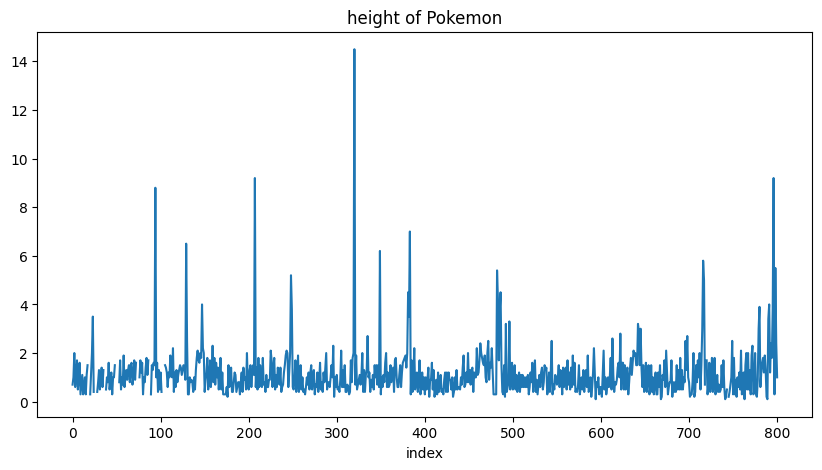

In [3]:
pokemon['height_m'].plot(xlabel = 'index', 
                         title = 'height of Pokemon');

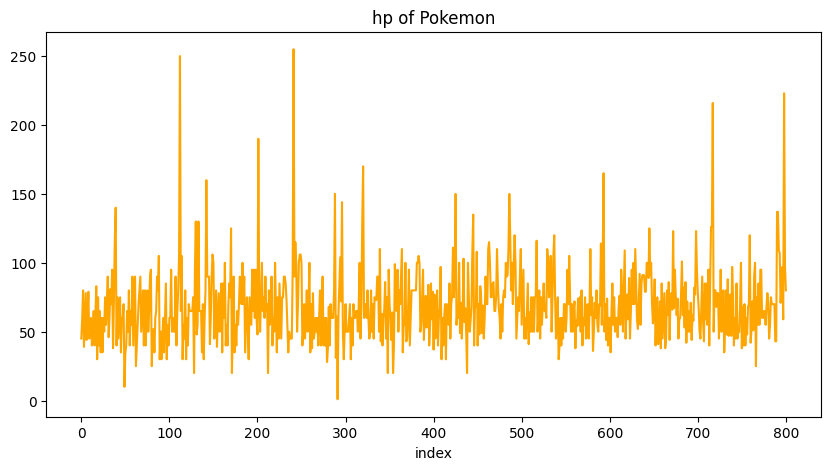

In [4]:
# note a single value is plotted against the index value

pokemon['hp'].plot(xlabel = 'index', 
                   title = 'hp of Pokemon', color = 'orange');

## a scatterplot

- need an x, a y, and kind = 'scatter'

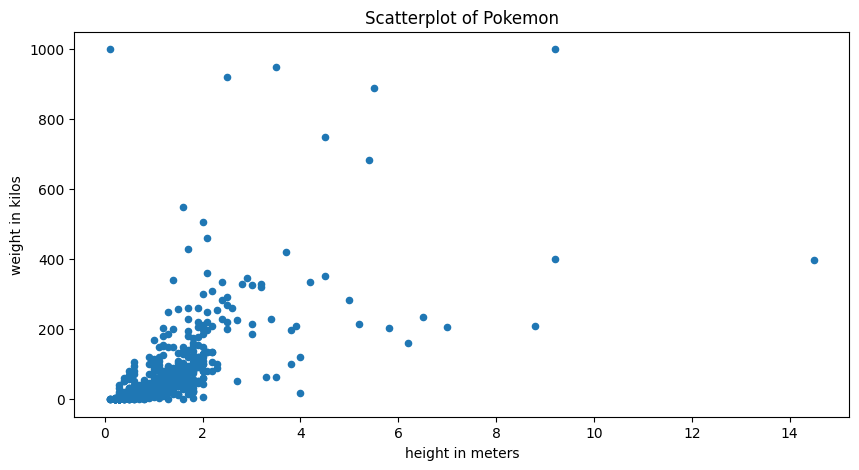

In [5]:
pokemon.plot(x = 'height_m', y = 'weight_kg', kind = 'scatter',
             xlabel = 'height in meters', ylabel = 'weight in kilos',
             title = "Scatterplot of Pokemon");

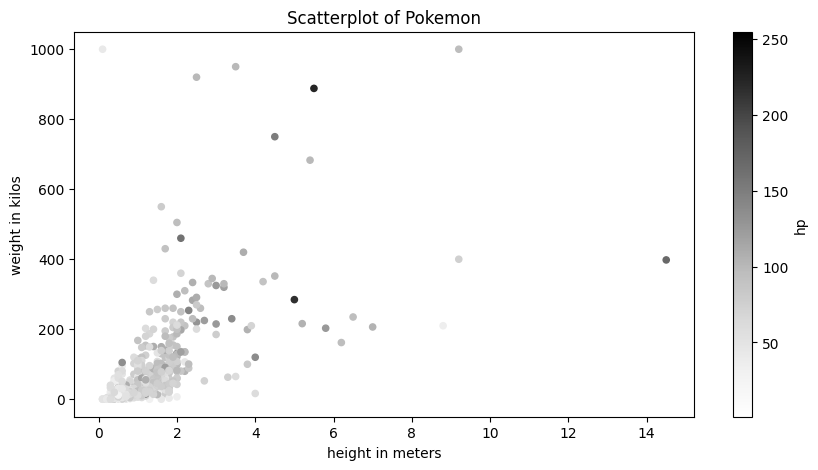

In [6]:
# we can add a third variable as color defaults to grayscale
pokemon.plot(x = 'height_m', y = 'weight_kg', kind = 'scatter',
             xlabel = 'height in meters', ylabel = 'weight in kilos',
             c = 'hp', 
             title = "Scatterplot of Pokemon");

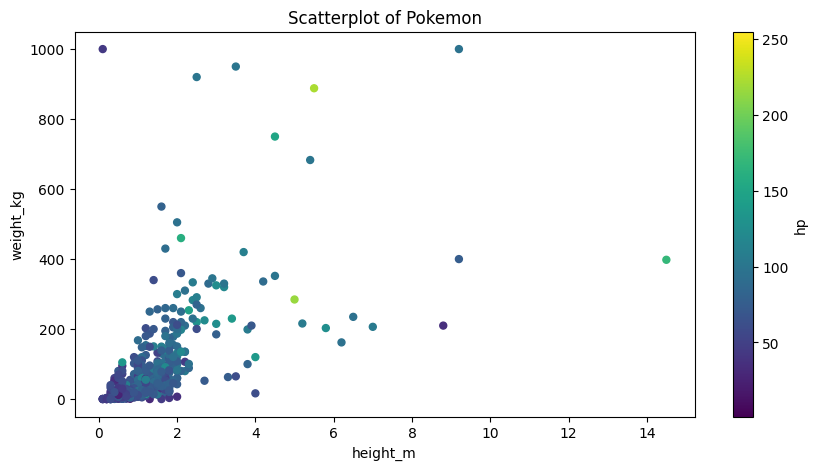

In [7]:
pokemon.plot(x = "height_m", y = "weight_kg", kind = "scatter",
             c = "hp", cmap="viridis", 
             s = 25, title = "Scatterplot of Pokemon");

In [8]:
%%script false --no-raise-error
# Create a plot and save the object, note colorbar = False and no title
ax = pokemon.plot(x = "height_m", y = "weight_kg", kind = "scatter", 
                  xlabel = 'height in meters', ylabel = 'weight in kilos',
                  c = "hp", cmap="viridis", 
                  s = 25, colorbar=False)
# Using matplotlib create a colorbar, ax.collections are the plotted points
cbar = plt.colorbar(ax.collections[0])

# Set the label of the colorbar
cbar.set_label('Hit Points')

# Set the title of the plot
ax.set_title("Scatterplot of Pokemon with custom labels")

#plt.savefig("pokemon_scatter.png")

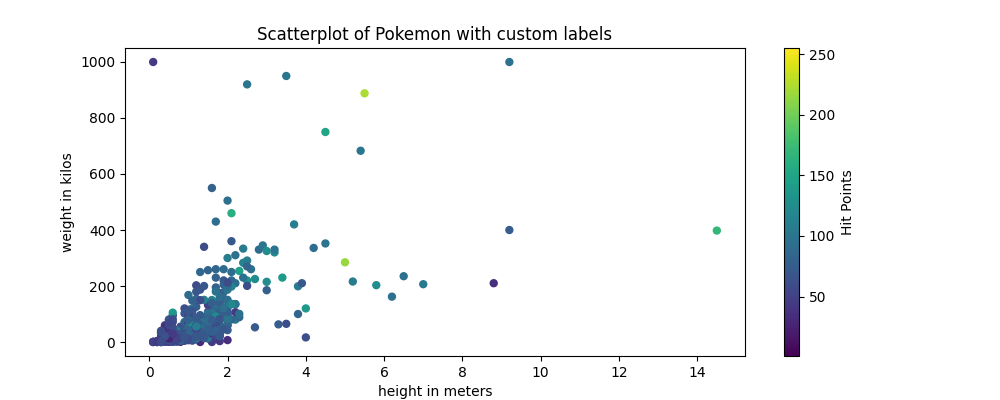

In [9]:
from IPython.display import Image
Image("pokemon_scatter.png")

We can learn more about colors and colormaps

https://matplotlib.org/stable/tutorials/colors/colors.html


https://matplotlib.org/stable/tutorials/colors/colormaps.html

## barplot

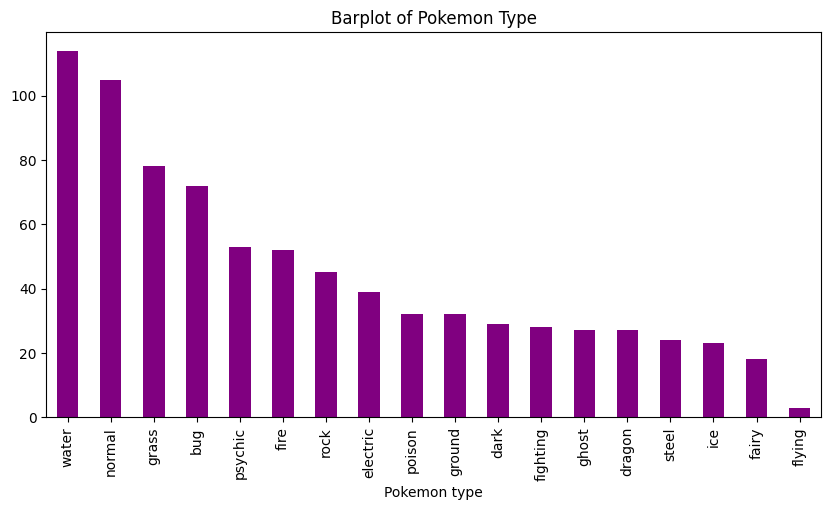

In [10]:
pokemon['type1'].value_counts().plot(kind='bar', color = 'purple',
                                     xlabel = 'Pokemon type',
                                     title = 'Barplot of Pokemon Type');

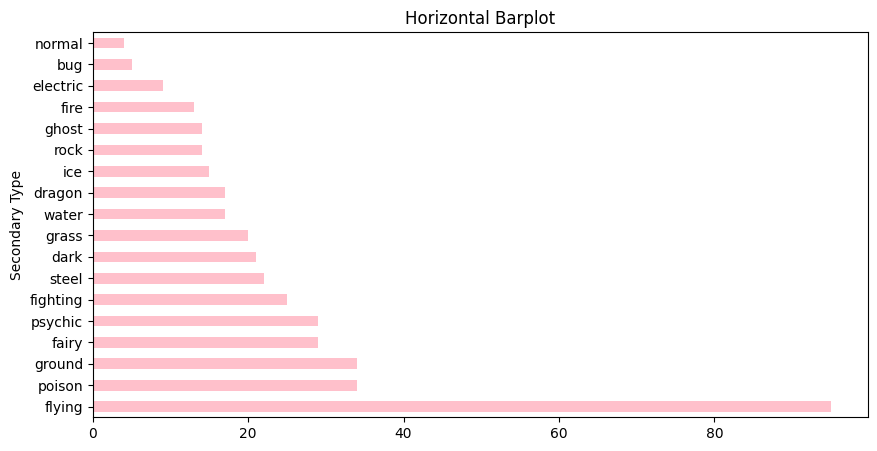

In [11]:
pokemon['type2'].value_counts().plot(kind = 'barh', color = 'pink',
                                     ylabel = 'Secondary Type',
                                     title = 'Horizontal Barplot');

## KDE (Kernel Density Estimator) plot

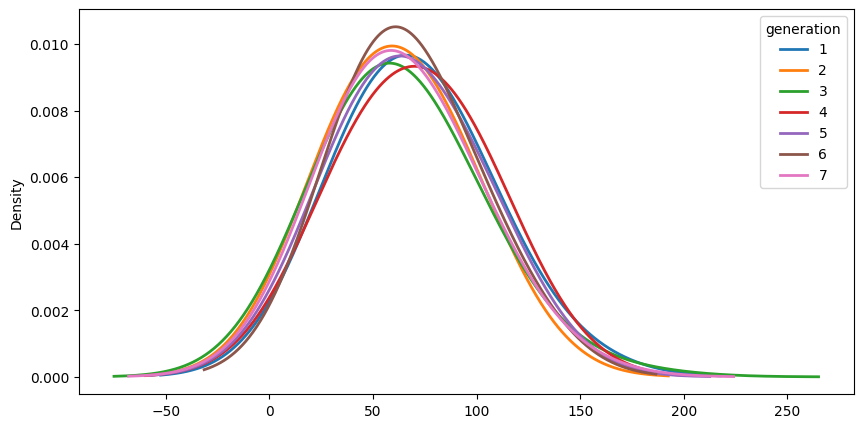

In [12]:
# Converting to wide dataframe
data_wide = pokemon.pivot(columns = 'generation', values = 'speed')
  
# plotting multiple kde
data_wide.plot.kde(figsize = (10, 5), linewidth = 2, bw_method=1);

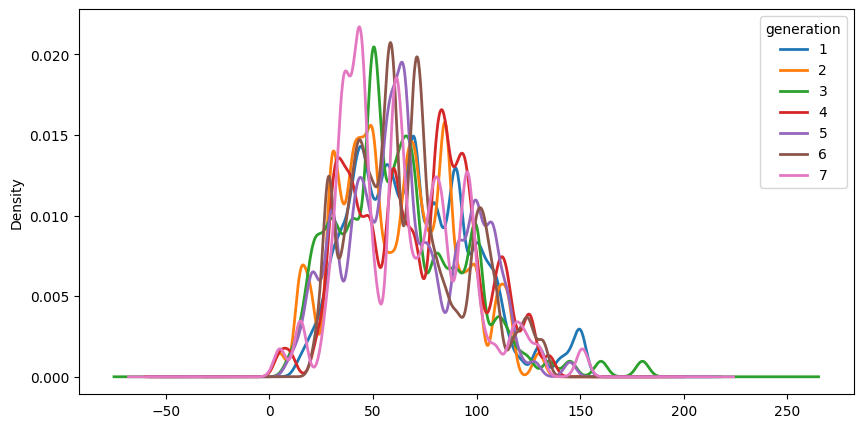

In [13]:
# plotting multiple kde
data_wide.plot.kde(figsize = (10, 5), linewidth = 2, bw_method=0.1);

## Histogram (more on this later)

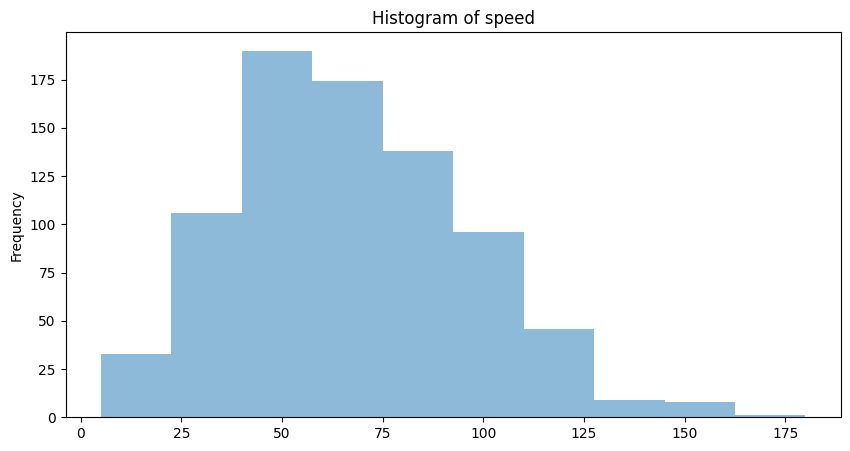

In [14]:
pokemon['speed'].plot(kind = 'hist', alpha = 0.5, 
                      title = 'Histogram of speed');

## Boxplot
- example it would be nice to have more control height_m at the top is automatically placed there and is not a label but a tick mark

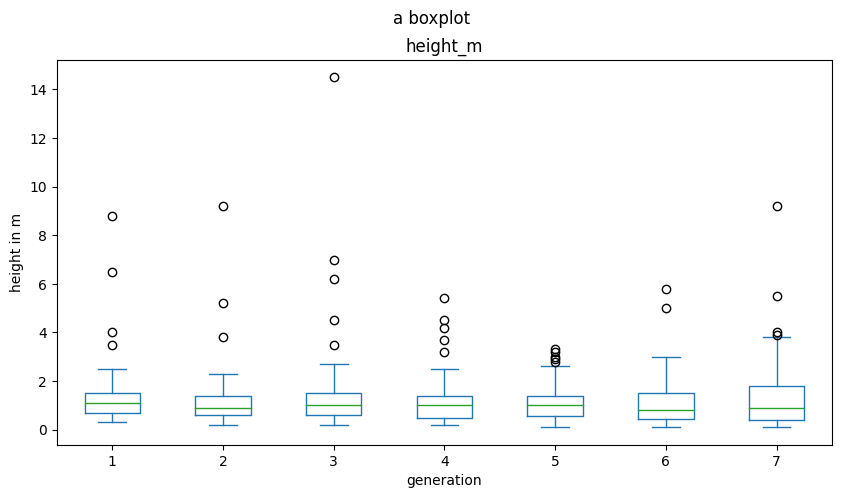

In [15]:
pokemon.plot.box(column = ["height_m"], 
                 by = "generation", 
                 xlabel = "generation", 
                 ylabel = "height in m",
                 title = "a boxplot");

- a possible get around is to use the dataframe version of Pandas plotting functions, the defaults are not the greatest, but

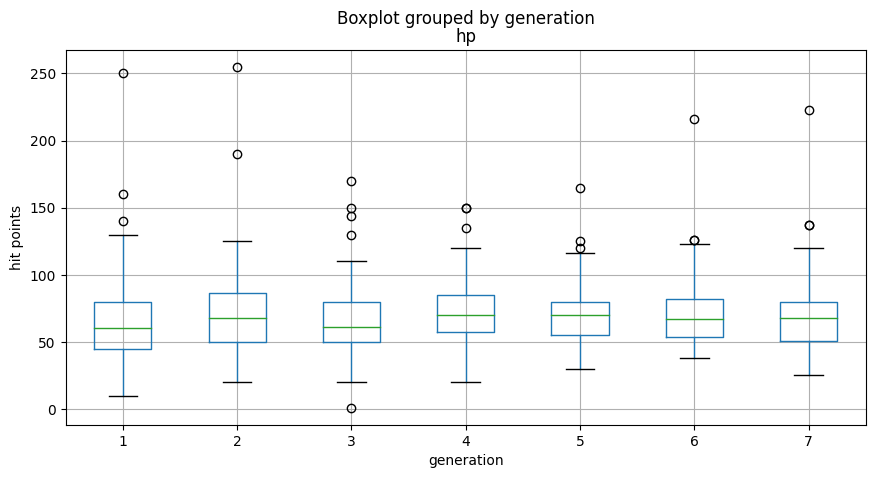

In [16]:
ax = pokemon.boxplot(column = 'hp', by = 'generation', 
                 xlabel = 'generation',  ylabel = 'hit points');

plt.show()

- ... we have more ways of customizing it (but we start to hit the limits of plotting in pandas)

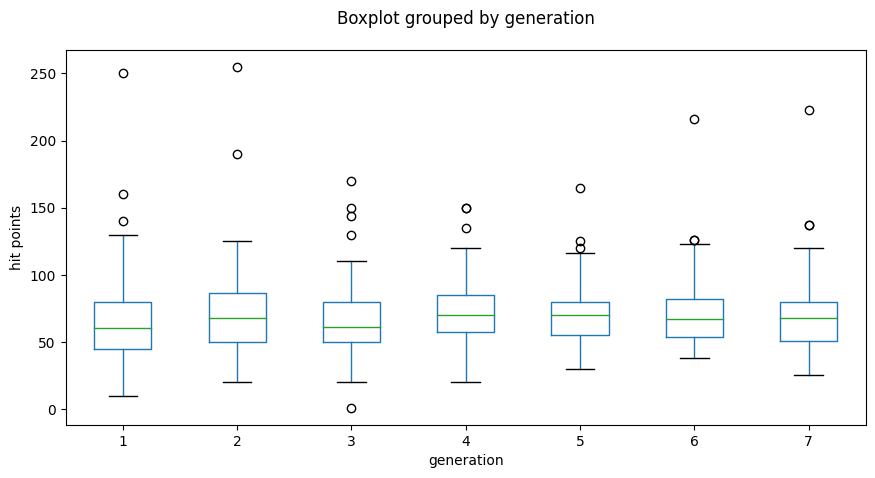

In [17]:
ax = pokemon.boxplot(column = 'hp',  grid = False,
                 by = 'generation',  xlabel = 'generation', 
                 ylabel = 'hit points');
ax.set_title('')

plt.show()

## (ha ha) Pie Chart

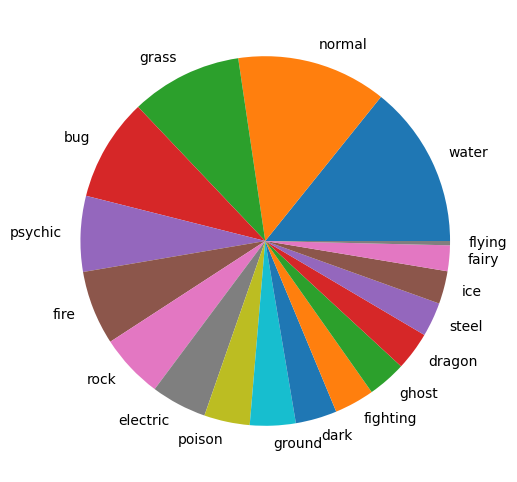

In [18]:
pokemon["type1"].value_counts().plot.pie(figsize=(6, 6),
                                         ylabel ="");

## Donut plot (need matplotlib now)
- it is like a stacked bar that has been bent
- it is simply less distorted and easier to make comparisons

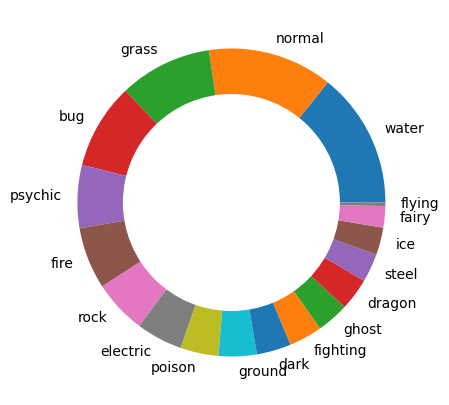

In [19]:
pokemon["type1"].value_counts().plot.pie(figsize=(5, 5),
                                         ylabel ="") # no semi-colon
# add a circle to it
a_circle = plt.Circle( (0,0), 0.7, color='white')

#  get current figure
p = plt.gcf() 

# get current axes, render object circle into it 
p.gca().add_artist(a_circle) 

plt.show()

## Matplotlib

- Pandas plotting is limited and it's not canonical, just convenient
- Matplotlib is data viz library built on top of NumPy arrays
- Also designed to work with SciPy
- It works well with many operating systems and graphics types.  
- Therefore matplotlib should work regardless of which operating system you are using or which output format you wish. 
- But there are newer tools, still, don't ignore it.

## Creating a simple plot

- Matplotlib is based in Numpy
- We can create arrays of the values to plot.
- Here we create an array of 500 values from 0 to pi.

In [20]:
x = np.linspace(0, np.pi * 2, 500)
x[0:4]

array([0.        , 0.01259155, 0.02518311, 0.03777466])

We then calculate the y values we wish to plot. In this case, we'll keep it simple and calculate sin of x (in radians).

In [21]:
y = np.sin(x)
y[0:4]

array([0.        , 0.01259122, 0.02518045, 0.03776568])

## Line Plot

To create a plot, you can call `plt.plot(x, y)`. To have it appear, you call `plt.show()`. `plt.show()` is much like calling `print()`. In Jupyter, if you do not call `plt.show()`, the plot will still often appear, but it is generally considered good practice to call `plt.show()` becaues it suppresses iPython nt.

Prior to calling `plt.show()`, you can call optionally other functions which will modify the plot, such as adding a title or changing the axis limits.

The default behavior of `plt.plot()` is to plot the points and connect them with lines. 

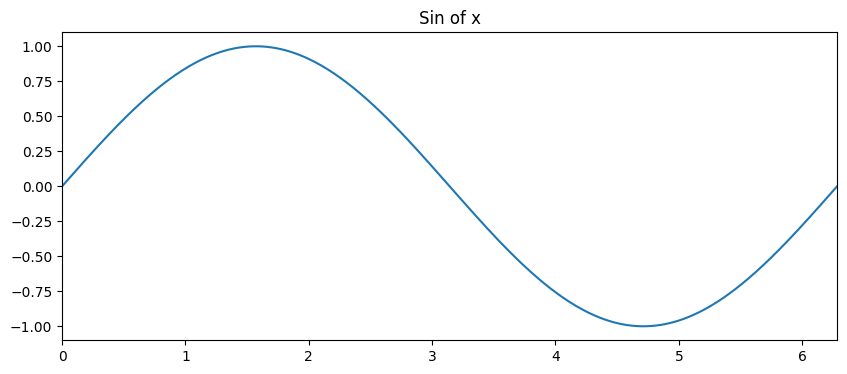

In [22]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.plot(x, y)
plt.title("Sin of x") # optional
plt.xlim(0,2 * np.pi) # optional
plt.show()

## Using pandas with matplotlib

- Plotting two series in this example

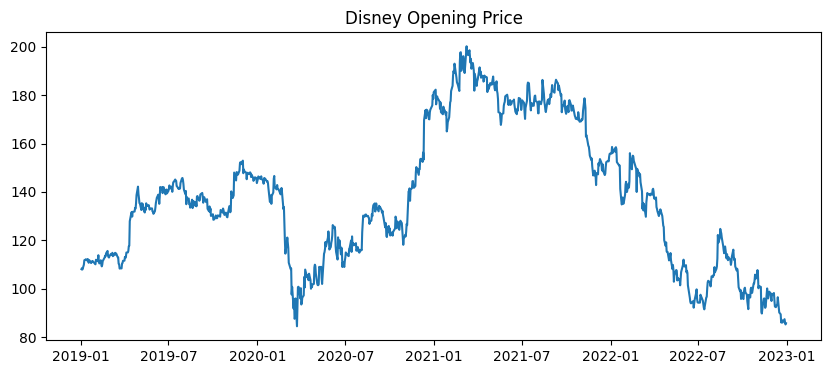

In [23]:
DIS = pd.read_csv("http://www.stat.ucla.edu/~vlew/datasets/DISNEY.csv", 
                  parse_dates = ["Date"])
plt.plot(DIS["Date"], DIS["Open"]) # using plt matplotlib
plt.title("Disney Opening Price") 
plt.show()

## Scatterplot

If you do not want the points to be connected with a line, you can ask for a scatterplot.

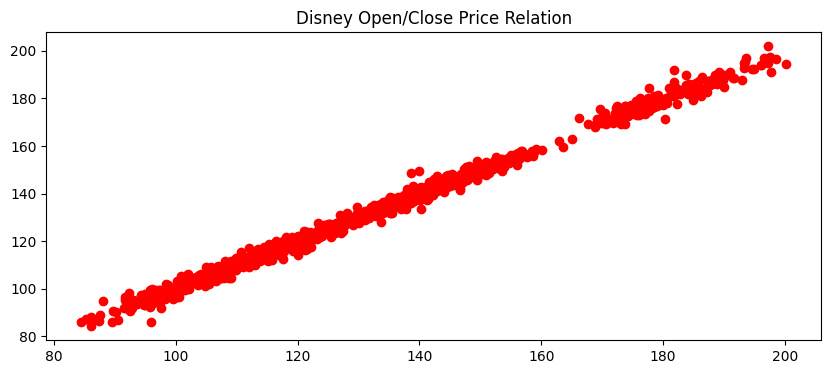

In [24]:
plt.scatter(DIS["Open"], DIS["Close"], c = 'red')
plt.title("Disney Open/Close Price Relation") 
plt.show()

## Multiple functions or sequences on the same graph

Repeated calls to `plt.plot()` will add lines to the same plot.

In [25]:
x = np.linspace(0, np.pi * 2, 500)
y = np.sin(x)
z = np.tan(x)
w = np.cos(x)

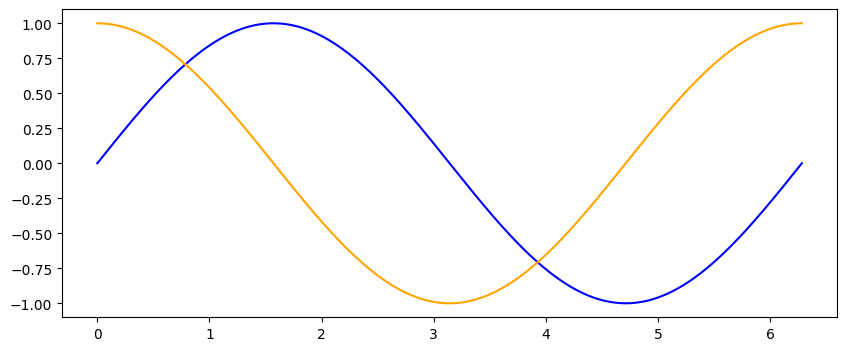

In [26]:
plt.plot(x, y, 'blue')
plt.plot(x, w, 'orange')
plt.show()

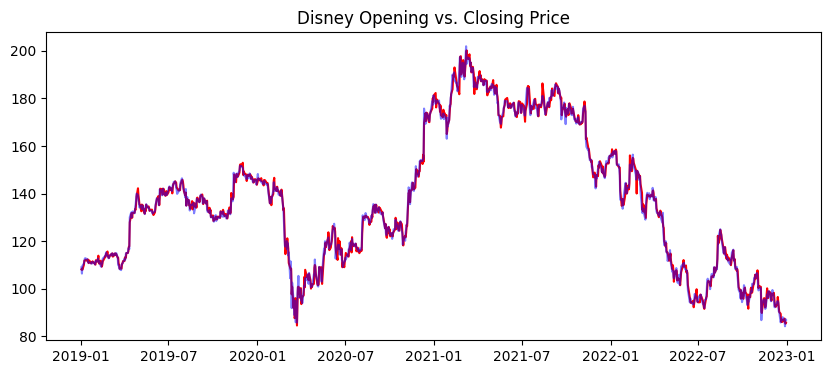

In [27]:
plt.plot(DIS["Date"], DIS["Open"], 'red')
plt.plot(DIS["Date"], DIS["Close"], 'blue', alpha = 0.5)
plt.title("Disney Opening vs. Closing Price") 
plt.show()

## changing labels and axis limits

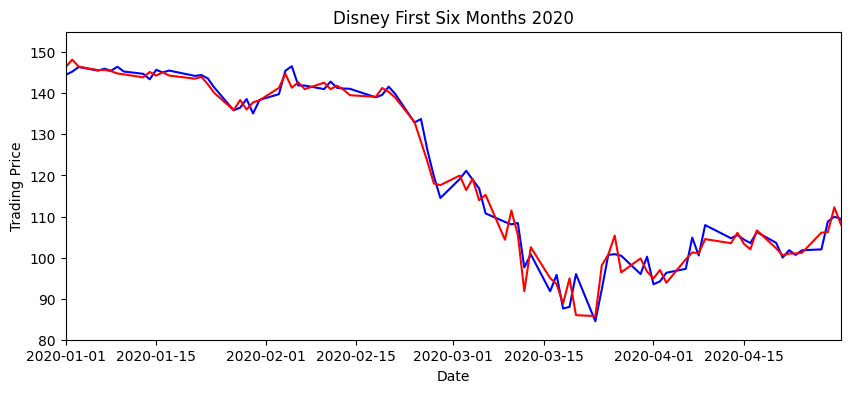

In [28]:
left = dt.date(2020, 1, 1)
right = dt.date(2020, 4, 30)
plt.plot(DIS["Date"], DIS["Open"], 'blue')
plt.plot(DIS["Date"], DIS["Close"], 'red')
plt.xlim(left, right)
plt.ylim(80, 155)
plt.xlabel('Date')
plt.ylabel('Trading Price')
plt.title("Disney First Six Months 2020") # optional
plt.show()

## Markers

- https://matplotlib.org/stable/api/markers_api.html

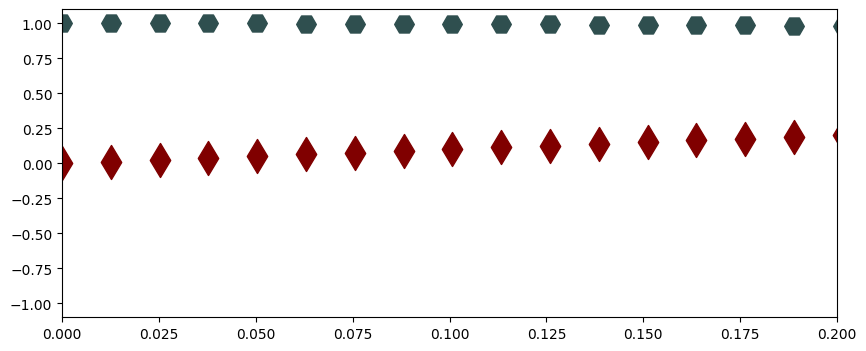

In [29]:
plt.scatter(x, y, s = 300, marker = 'd', color = 'maroon')
plt.scatter(x, w, s = 200, marker = 'H', color = 'darkslategrey')
plt.xlim([0, .2])
plt.show()

## Plot options: colors

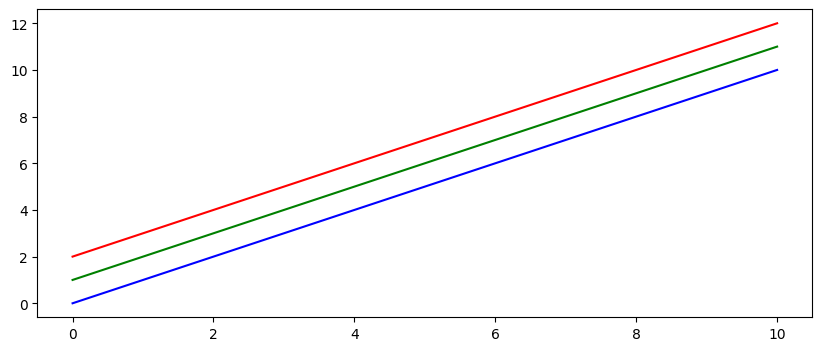

In [30]:
x = np.linspace(0, 10, 1000)
plt.plot(x, x, color = 'b')
plt.plot(x, x+1, color = 'g')
plt.plot(x, x+2, color = 'r')
plt.show()

### List of colors and single character shortcuts

|character|color|
|---|---|
|'b'|blue|
|'g'|green|
|'r'|red|
|'c'|cyan|
|'m'|magenta|
|'y'|yellow|
|'k'|black|
|'w'|white|

List of Named Colors: https://matplotlib.org/stable/gallery/color/named_colors.html

## More colors https://xkcd.com/color/rgb/

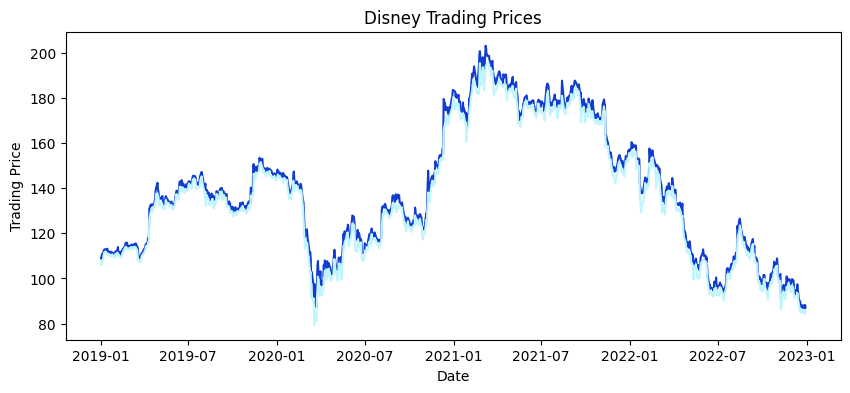

In [31]:
plt.plot(DIS["Date"], DIS["High"], c='#113ccf') 
plt.plot(DIS["Date"], DIS["Low"], c='#bff5fd')
plt.xlabel('Date')
plt.ylabel('Trading Price')
plt.title("Disney Trading Prices") # optional
plt.show()

## Plot options: line type

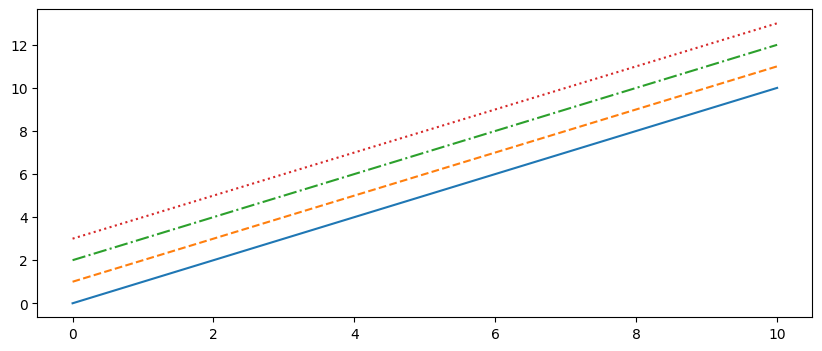

In [32]:
# line style
x = np.linspace(0, 10, 1000)
plt.plot(x,  x , linestyle = '-')  # solid
plt.plot(x, x+1, linestyle = '--') # dashed
plt.plot(x, x+2, linestyle = '-.') # dash dot
plt.plot(x, x+3, linestyle = ':')  # dotted
plt.show() # default behavior uses different colors for multiple lines

https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

## Plot options: figure size, axis, title

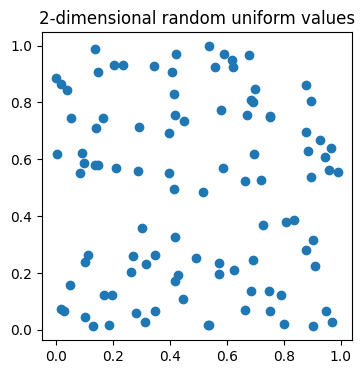

In [33]:
np.random.seed(1)
x = np.random.random(100)
y = np.random.random(100)
plt.figure(figsize = (4,4))  # define the properties of the figure first
plt.scatter(x,y)             # then add content
plt.axis('equal')            # alter properties
plt.title('2-dimensional random uniform values')
plt.show()

documentation for figure() https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

## adding point size and color options to a scatter plot

In [34]:
z = 100 * np.random.randint(1,11,100)  # use for size
w = np.random.randint(0,5,100) # use for color
print(z)
print(w)

[1000  600  500 1000  600  300  600  700  700  900  800  800  800  300
  700  100  600  300  200  900  600 1000  500 1000  200  300  100  500
  800  100  700  300  500  400  700  800  700  400  100  700  500  800
  700  300 1000  600 1000 1000 1000  900  700  500  300 1000  500  100
  100  400  500 1000  400 1000  200  300  600  500  100  900  300  400
 1000 1000  500  500  900  300  200  700  400  900 1000  800  100  600
  300  300  900  600  100  600 1000  900  700  700  100  500  800  400
  100  200]
[2 0 1 4 2 3 4 4 2 1 2 0 3 3 2 0 0 0 0 2 4 0 4 1 2 1 2 4 1 3 1 1 2 4 1 0 2
 1 2 0 0 3 4 1 0 4 0 3 2 4 3 2 4 2 4 0 0 4 2 2 4 2 3 0 0 4 3 4 3 3 4 0 3 1
 4 4 3 2 2 2 2 2 0 2 1 2 3 0 0 1 1 3 3 3 1 3 3 3 1 3]


In [35]:
colors = np.array(['r','b','g','m','y'])
c = colors[w]
print(c)

['g' 'r' 'b' 'y' 'g' 'm' 'y' 'y' 'g' 'b' 'g' 'r' 'm' 'm' 'g' 'r' 'r' 'r'
 'r' 'g' 'y' 'r' 'y' 'b' 'g' 'b' 'g' 'y' 'b' 'm' 'b' 'b' 'g' 'y' 'b' 'r'
 'g' 'b' 'g' 'r' 'r' 'm' 'y' 'b' 'r' 'y' 'r' 'm' 'g' 'y' 'm' 'g' 'y' 'g'
 'y' 'r' 'r' 'y' 'g' 'g' 'y' 'g' 'm' 'r' 'r' 'y' 'm' 'y' 'm' 'm' 'y' 'r'
 'm' 'b' 'y' 'y' 'm' 'g' 'g' 'g' 'g' 'g' 'r' 'g' 'b' 'g' 'm' 'r' 'r' 'b'
 'b' 'm' 'm' 'm' 'b' 'm' 'm' 'm' 'b' 'm']


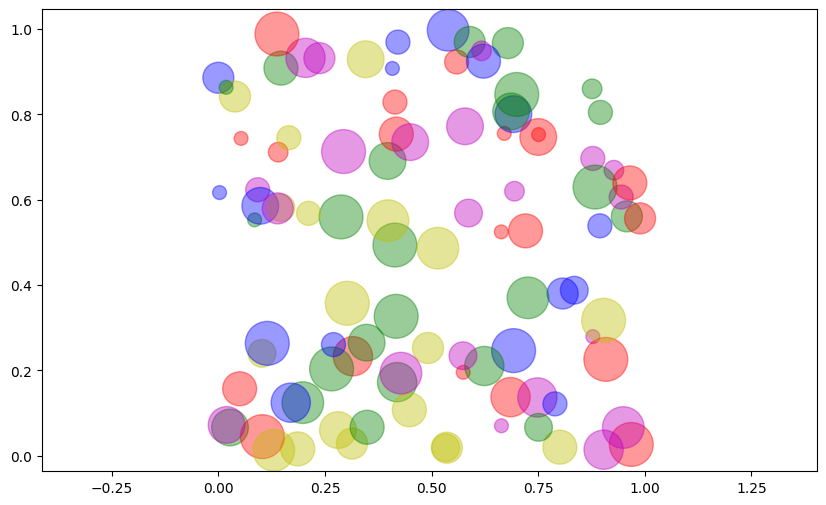

In [36]:
# we can map the property size (s) to a variable z
# we can map the color (c) to a variable c
plt.figure(figsize = (10,6))
plt.scatter(x, y, s = z, c = c, alpha = 0.4 )  # alpha modifies transparency
plt.axis('equal')
plt.show()

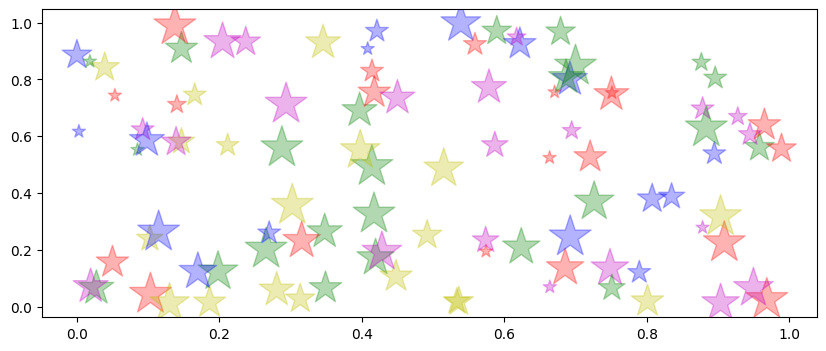

In [37]:
# you can change the point markers
plt.scatter(x, y, s = z, c = c, marker = "*", alpha = 0.3)
# But you can't map the markers to a variable
plt.show()

https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html

| character | description           |
|:---------:|-----------------------|
|    '.'    | point marker          |
|    ','    | pixel marker          |
|    'o'    | circle marker         |
|    'v'    | triangle_down marker  |
|    '^'    | triangle_up marker    |
|    '<'    | triangle_left marker  |
|    '>'    | triangle_right marker |
|    '1'    | tri_down marker       |
|    '2'    | tri_up marker         |
|    '3'    | tri_left marker       |
|    '4'    | tri_right marker      |
|    's'    | square marker         |
|    'p'    | pentagon marker       |
|    '*'    | star marker           |
|    'h'    | hexagon1 marker       |
|    'H'    | hexagon2 marker       |
|    '+'    | plus marker           |
|    'x'    | x marker              |
|    'D'    | diamond marker        |
|    'd'    | thin_diamond marker   |



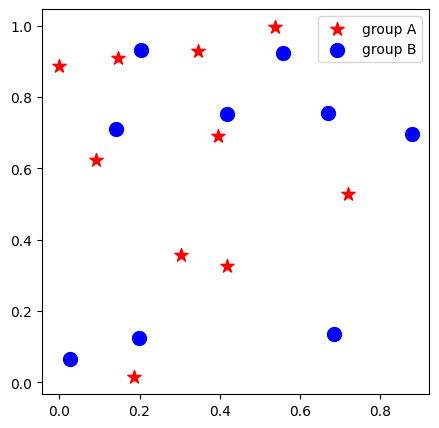

In [38]:
# You can call 'scatter' multiple times to plot different groups, each with its own label
# then call plt.legend() to add a legend with the appropriate labels
plt.figure(figsize = (5,5))
plt.scatter(x[0:10] , y[0:10] , s = 100, c = 'red' , marker = "*", label = 'group A')  
plt.scatter(x[11:20], y[11:20], s = 100, c = 'blue', marker = "o", label = 'group B')
plt.legend()
plt.show()

## Complex layouts with subplots

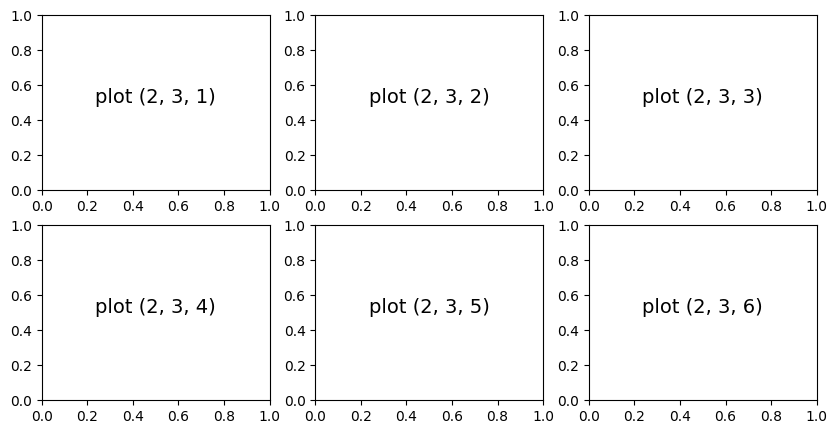

In [39]:
plt.figure(figsize = (10,5))
for i in range(1, 7):
    plt.subplot(2, 3, i)   # two rows of subplots, three columns of plots, work in plot i
    plt.text(0.5, 0.5, 'plot ' + str((2, 3, i)), fontsize = 14, ha='center')  
    # plt.text adds text, first two will be the xy position, the character string

### Subplots example

In [40]:
%%script false --no-raise-error
x = np.linspace(0, np.pi * 2, 500)
y = np.sin(x)
z = np.tan(x)
w = np.cos(x)
plt.subplot(2,2,1)  # number of rows, number of columns, which plot you want to draw
plt.plot(x, y)
plt.title("sin(x)")

plt.subplot(2,2,2) # subplot 2 will be upper right
plt.plot(x, w)
plt.title("cos(x)")

plt.subplot(2,2,3) # subplot 3 will be lower left
plt.plot(x, z)
plt.title("tan(x)")

plt.subplot(2,2,4)
plt.plot(x,y, 'red')
plt.plot(x,w, 'blue')
plt.title("sin and cos")
# plt.savefig("sin_and_cos.png")
# plt.show()

![sin_and_cos.png](sin_and_cos.png)

In [41]:
%%script false --no-raise-error
plt.figure(figsize = (10,5))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0]) # gridspec uses 0 based indexing
plt.scatter(x[0:10], y[0:10])
plt.subplot(grid[0, 1:3])  # top row, columns 1:3
plt.hist(x)
plt.subplot(grid[1, :2])
plt.hist(y)
plt.subplot(grid[1, 2])
plt.plot(x[0:4], y[0:4], c = 'r')
#plt.savefig("more_complicated_grids.png")
#plt.show()

![more_complicated_grids.png](more_complicated_grids.png)

subplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

## More about Histograms

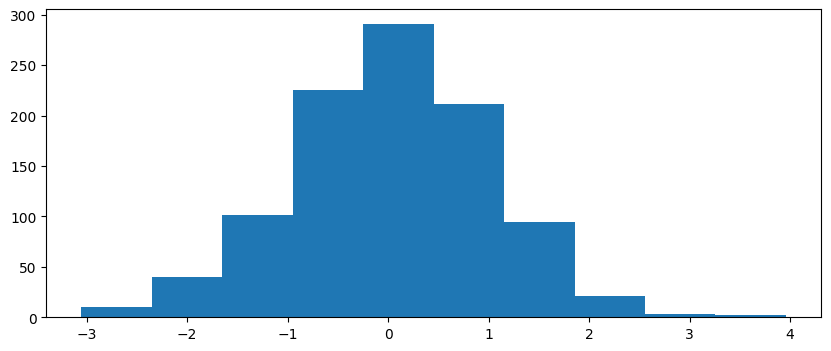

In [42]:
data = np.random.randn(1000)

plt.hist(data)
plt.show()

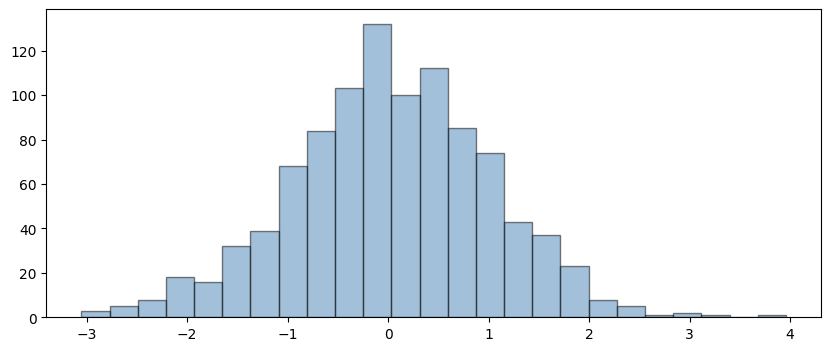

In [43]:
# alter bins and color options
plt.hist(data, bins=25, alpha=0.5,
          color='steelblue', edgecolor='black')
plt.show()

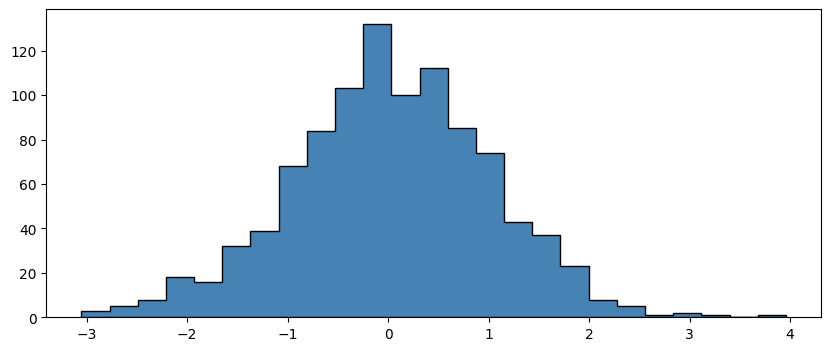

In [44]:
# histtype = stepfilled
plt.hist(data, bins=25, alpha=1,
         histtype = 'stepfilled', color='steelblue', edgecolor='black')
plt.show()

hist documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

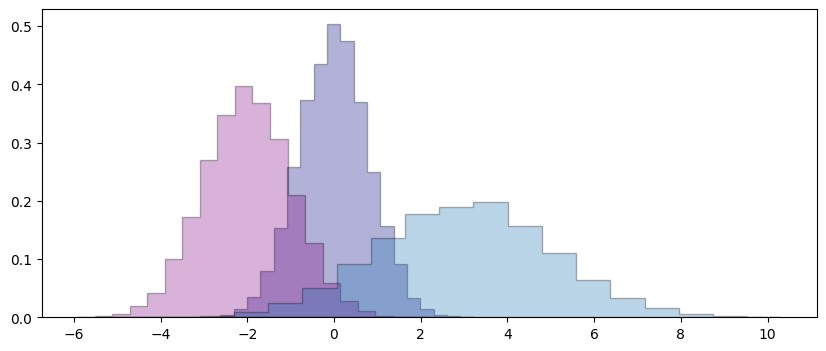

In [45]:
x1 = np.random.normal(0, 0.8, 10000)
x2 = np.random.normal(-2, 1, 10000)
x3 = np.random.normal(3, 2, 10000)

# set up a dictionary with arguments
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=20, edgecolor = 'black')

# use the same arguments for all of the histograms without the need to copy and paste
plt.hist(x1, **kwargs, color = 'navy')
plt.hist(x2, **kwargs, color = "purple")
plt.hist(x3, **kwargs)
plt.show()

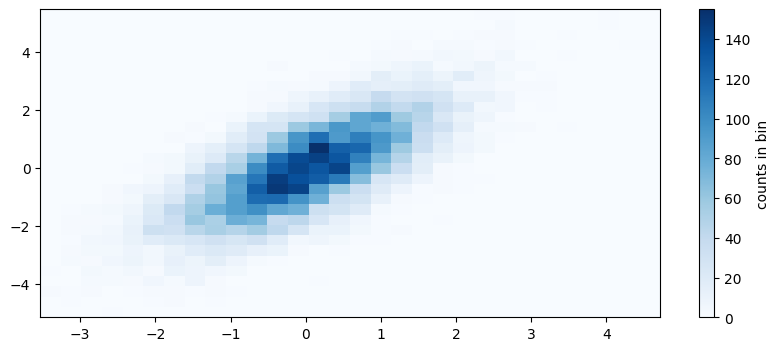

In [46]:
# 2d histograms
mean = [0, 0]
cov = [[1, 1], 
       [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.show()

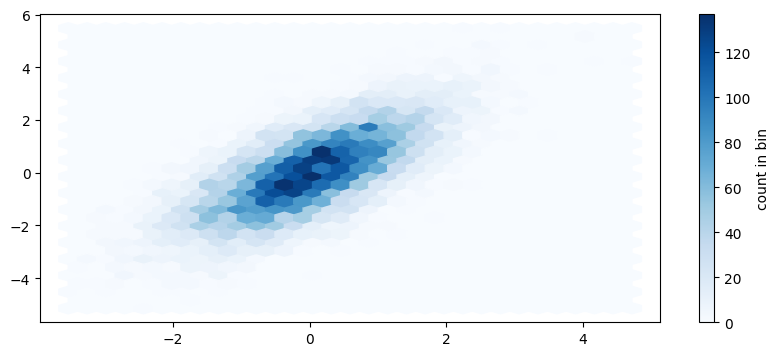

In [47]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## two dimensional functions

In [48]:
x = np.array([0,1,2,3])
y = np.array([-1,0,1, 2])
print(x)
print(y)
X, Y = np.meshgrid(x,y) # sees x has length 3, y has length 4, so the result is a 4 x 3 grid

[0 1 2 3]
[-1  0  1  2]


In [49]:
def f(x, y):
    return x * y
X, Y = np.meshgrid(x,y)
Z = f(X, Y)
print(Z)

[[ 0 -1 -2 -3]
 [ 0  0  0  0]
 [ 0  1  2  3]
 [ 0  2  4  6]]


In [50]:
x = np.linspace(-3, 3, 101)
y = np.linspace(-3, 3, 101)
X, Y = np.meshgrid(x, y)

def g (x, y): 
    return np.exp(-(x**2)) * np.exp(-(y**2)) # product of 2 normal distributions

Z = g(X, Y)

In [51]:
Z.shape

(101, 101)

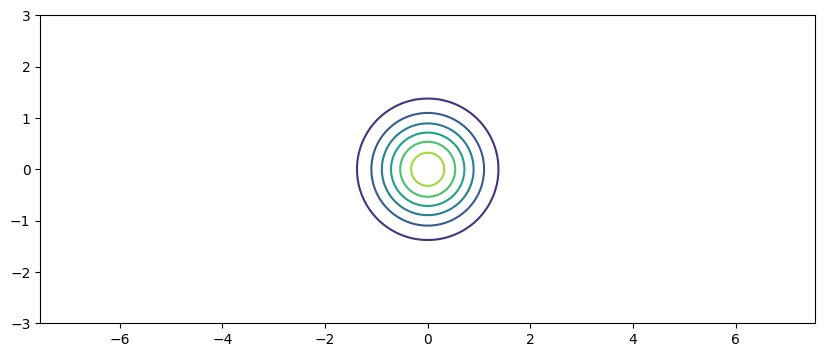

In [52]:
plt.contour(X, Y, Z)
plt.axis('equal')
plt.show()

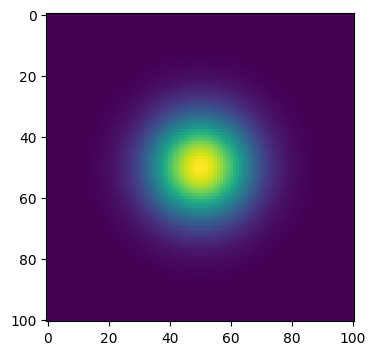

In [53]:
plt.imshow(Z)
plt.show()

<h1> Statistics 21 <br/> Have a good night! </h1>

<script>
    setBackgroundImage('Window1.jpg', 'black');
</script>